In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler

%matplotlib inline
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
#!pip install xgboost

In [52]:
#!pip install lightgbm

In [2]:
df = pd.read_csv('data/covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


#### Numeric Features

In [3]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 55


#### Categorical Features

In [4]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


#### Discrete Features

In [5]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 45


#### Continuous Features

In [6]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 10


In [7]:
continuous_features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

####  Check for Anomalies & Outliers

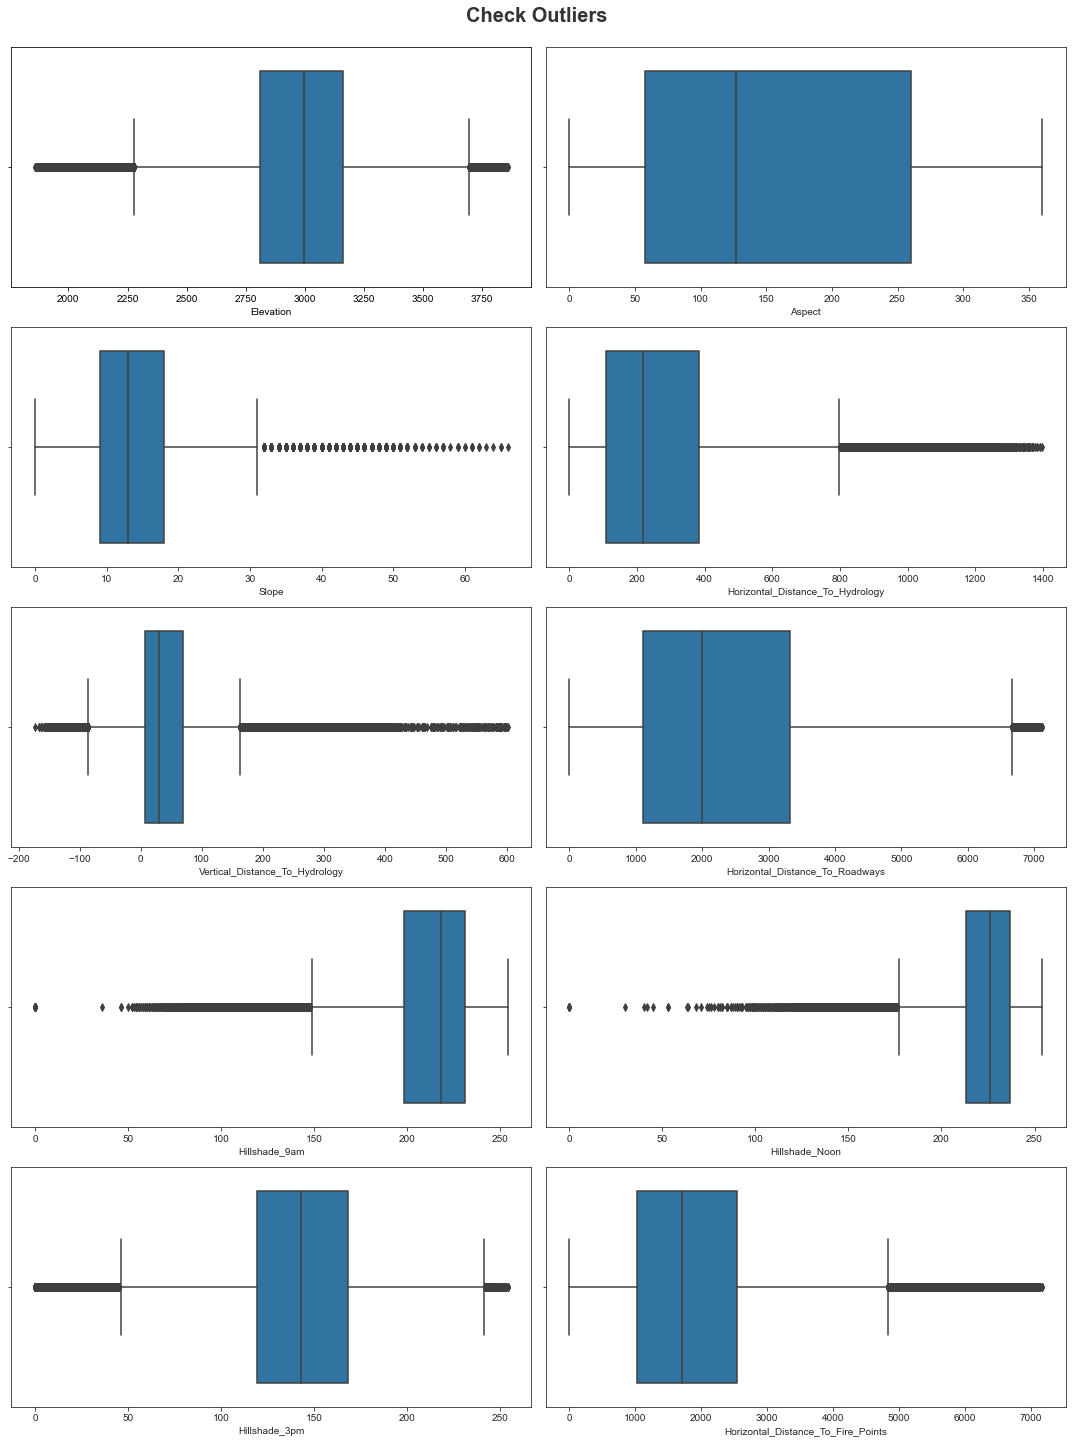

In [8]:
plt.figure(figsize=(15, 20))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(continuous_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df[continuous_features[i]])
    plt.tight_layout()

In [9]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit.round(2))
    print("Lower limit",lower_limit.round(2))
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [10]:
for col in continuous_features:
         detect_outliers(col)


 #### Elevation ####
percentile25 2809.0
percentile75 3163.0
Upper limit 3694.0
Lower limit 2278.0

 #### Aspect ####
percentile25 58.0
percentile75 260.0
Upper limit 563.0
Lower limit -245.0

 #### Slope ####
percentile25 9.0
percentile75 18.0
Upper limit 31.5
Lower limit -4.5

 #### Horizontal_Distance_To_Hydrology ####
percentile25 108.0
percentile75 384.0
Upper limit 798.0
Lower limit -306.0

 #### Vertical_Distance_To_Hydrology ####
percentile25 7.0
percentile75 69.0
Upper limit 162.0
Lower limit -86.0

 #### Horizontal_Distance_To_Roadways ####
percentile25 1106.0
percentile75 3328.0
Upper limit 6661.0
Lower limit -2227.0

 #### Hillshade_9am ####
percentile25 198.0
percentile75 231.0
Upper limit 280.5
Lower limit 148.5

 #### Hillshade_Noon ####
percentile25 213.0
percentile75 237.0
Upper limit 273.0
Lower limit 177.0

 #### Hillshade_3pm ####
percentile25 119.0
percentile75 168.0
Upper limit 241.5
Lower limit 45.5

 #### Horizontal_Distance_To_Fire_Points ####
percentile25 102

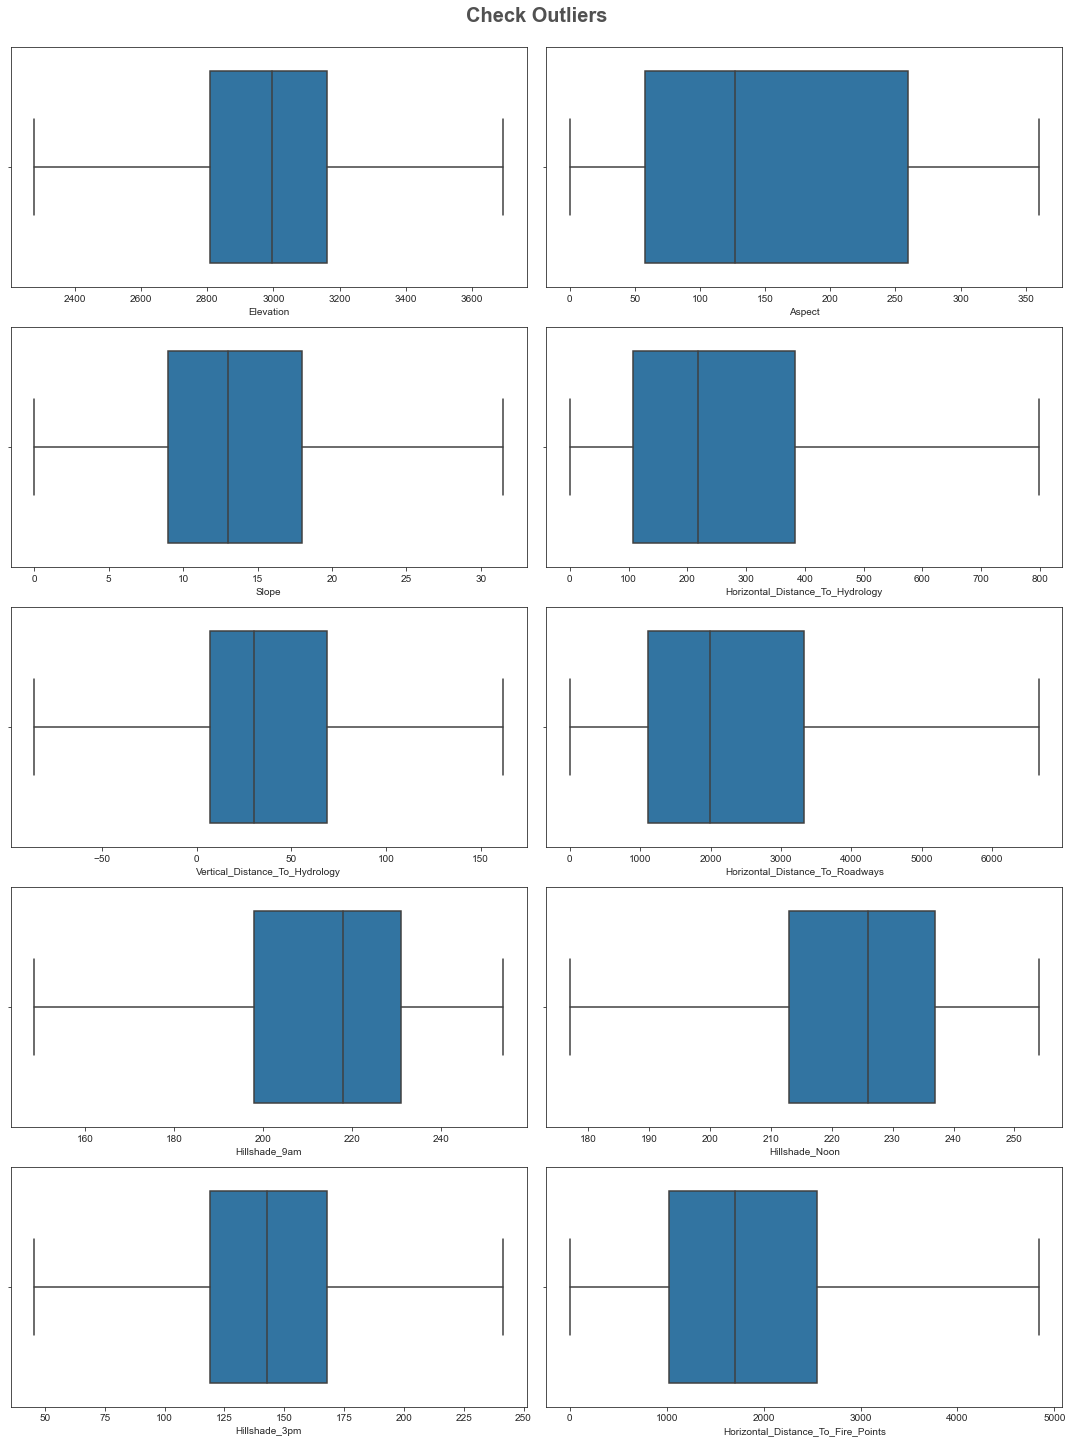

In [11]:
plt.figure(figsize=(15, 20))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(continuous_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df[continuous_features[i]])
    plt.tight_layout()

In [12]:
df[continuous_features].skew(axis=0, skipna=True)

Elevation                            -0.628218
Aspect                                0.402628
Slope                                 0.571735
Horizontal_Distance_To_Hydrology      0.850074
Vertical_Distance_To_Hydrology        0.904680
Horizontal_Distance_To_Roadways       0.711945
Hillshade_9am                        -0.787376
Hillshade_Noon                       -0.617792
Hillshade_3pm                        -0.139751
Horizontal_Distance_To_Fire_Points    0.878567
dtype: float64

- A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [13]:
continuous_features

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [14]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
df['Wilderness_Area_Type'] = (df.iloc[:, 10:15] == 1).idxmax(1)
#list of wilderness areas
wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())

In [20]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [21]:
df_copy = df.copy()
reverse_one_hot_encode(df_copy, 14, 56, "Soil_Type")

In [22]:
df_copy

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area_Type,Soil_Type
0,2596,51,3.0,258,0,510,221.0,232,148.0,4839,...,0,0,0,0,0,0,0,5,Wilderness_Area1,29
1,2590,56,2.0,212,-6,390,220.0,235,151.0,4839,...,0,0,0,0,0,0,0,5,Wilderness_Area1,29
2,2804,139,9.0,268,65,3180,234.0,238,135.0,4839,...,0,0,0,0,0,0,0,2,Wilderness_Area1,12
3,2785,155,18.0,242,118,3090,238.0,238,122.0,4839,...,0,0,0,0,0,0,0,2,Wilderness_Area1,30
4,2595,45,2.0,153,-1,391,220.0,234,150.0,4839,...,0,0,0,0,0,0,0,5,Wilderness_Area1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20.0,85,17,108,240.0,237,118.0,837,...,0,0,0,0,0,0,0,3,Wilderness_Area3,3
581008,2391,152,19.0,67,12,95,240.0,237,119.0,845,...,0,0,0,0,0,0,0,3,Wilderness_Area3,3
581009,2386,159,17.0,60,7,90,236.0,241,130.0,854,...,0,0,0,0,0,0,0,3,Wilderness_Area3,3
581010,2384,170,15.0,60,5,90,230.0,245,143.0,864,...,0,0,0,0,0,0,0,3,Wilderness_Area3,3


In [26]:
all_features_w_label = continuous_features + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
trees_w_numeric_soil = df_copy[all_features_w_label]
trees_w_numeric_soil

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type,Cover_Type
0,2596,51,3.0,258,0,510,221.0,232,148.0,4839,1,0,0,0,29,5
1,2590,56,2.0,212,-6,390,220.0,235,151.0,4839,1,0,0,0,29,5
2,2804,139,9.0,268,65,3180,234.0,238,135.0,4839,1,0,0,0,12,2
3,2785,155,18.0,242,118,3090,238.0,238,122.0,4839,1,0,0,0,30,2
4,2595,45,2.0,153,-1,391,220.0,234,150.0,4839,1,0,0,0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20.0,85,17,108,240.0,237,118.0,837,0,0,1,0,3,3
581008,2391,152,19.0,67,12,95,240.0,237,119.0,845,0,0,1,0,3,3
581009,2386,159,17.0,60,7,90,236.0,241,130.0,854,0,0,1,0,3,3
581010,2384,170,15.0,60,5,90,230.0,245,143.0,864,0,0,1,0,3,3


In [29]:
y = trees_w_numeric_soil["Cover_Type"]
y

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64

In [30]:
all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_areas +
                 ['Soil_Type'])
X = trees_w_numeric_soil[all_features]
X

,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type
0,2596,51,3.0,0,510,232,148.0,4839,1,0,0,0,29
1,2590,56,2.0,-6,390,235,151.0,4839,1,0,0,0,29
2,2804,139,9.0,65,3180,238,135.0,4839,1,0,0,0,12
3,2785,155,18.0,118,3090,238,122.0,4839,1,0,0,0,30
4,2595,45,2.0,-1,391,234,150.0,4839,1,0,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20.0,17,108,237,118.0,837,0,0,1,0,3
581008,2391,152,19.0,12,95,237,119.0,845,0,0,1,0,3
581009,2386,159,17.0,7,90,241,130.0,854,0,0,1,0,3
581010,2384,170,15.0,5,90,245,143.0,864,0,0,1,0,3


In [31]:
# Split training set as training and validation set

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)

Training Data Shape: (464809, 13)
Validation Data Shape: (116203, 13)


In [40]:
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Label Shape: (464809,)
Validation Label Shape: (116203,)


In [41]:
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

In [42]:
# function to train a given model, generate predictions, and return accuracy score
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

#### K-Nearest Neighbor Classifier

In [43]:
# create model apply fit_evaluate_model
knn_classifier = KNeighborsClassifier()
knn_accuracy = fit_evaluate_model(knn_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", knn_accuracy)

Number of correct predictions made out of all predictions are: 0.9143567722003735


#### Random Forest Classifier

In [45]:
# create model apply fit_evaluate_model
rf_classifier = RandomForestClassifier()
rf_accuracy = fit_evaluate_model(rf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", rf_accuracy)

Number of correct predictions made out of all predictions are: 0.9556810065144618


#### Extra Trees (Random Forests) Classifier

In [46]:
# create model apply fit_evaluate_model
xrf_classifier = ExtraTreesClassifier()
xrf_accuracy = fit_evaluate_model(xrf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", xrf_accuracy)

Number of correct predictions made out of all predictions are: 0.9533488808378441


#### Light Gradient Boosting Machine (LightGBM) Classifier

In [55]:
# create model apply fit_evaluate_model
lgbm_classifier = LGBMClassifier()
lgbm_accuracy = fit_evaluate_model(lgbm_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", lgbm_accuracy)

Number of correct predictions made out of all predictions are: 0.84831716909202


#### Comparison of model performances

Text(0.5, 1.0, 'Accuracy Score of Different Models')

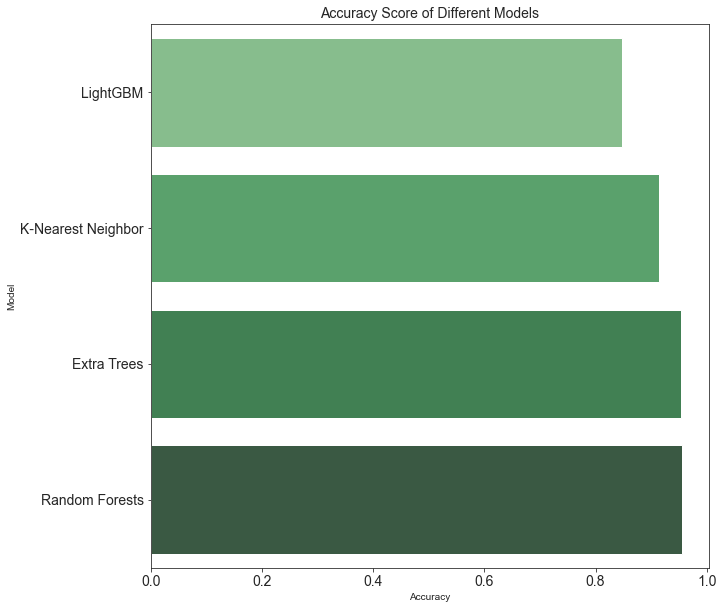

In [57]:
# create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": ["K-Nearest Neighbor", "LightGBM", "Random Forests", "Extra Trees"],
                                       "Accuracy": [knn_accuracy, lgbm_accuracy, rf_accuracy, xrf_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=True)

# set the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# set title arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

#### Perform Hyperparameter Tuning on the Best Model

In [58]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [50, 100, 300, 500, 1000]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [59]:
# create model
best_model = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=best_model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [61]:
# Fit on the all training data using random search object
random_cv.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
random_cv.best_estimator_